In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers,activations
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
import random
import matplotlib.pyplot as plt
random.seed(42)
TRAIN_DIR = '/content/drive/My Drive' #path of dataset
IMG_SIZE =128
input_shape=(IMG_SIZE,IMG_SIZE,3)

In [4]:
train_data=np.load("/content/drive/My Drive/plantvillage128_40_train.npy",allow_pickle=True)
valid_data = np.load("/content/drive/My Drive/plantvillage128_40_valid.npy",allow_pickle=True)

In [5]:
train_y=np.array([i[1] for i in train_data]).reshape(-1,1)
train_x=np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

valid_y=np.array([i[1] for i in valid_data]).reshape(-1,1)
valid_x=np.array([i[0] for i in valid_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

train_x.shape

(16000, 128, 128, 3)

In [6]:
valid_x.shape

(7804, 128, 128, 3)

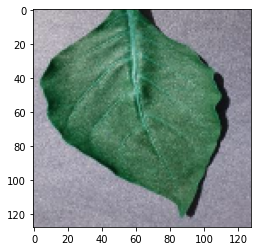

In [7]:
plt.imshow(train_x[10,:])

In [8]:
#train_x = train_x-train_x.mean()

In [9]:
'''start = 0
batch = int(train_x.shape[0]/2)
for i in range(2):
  train_x[start:batch] =np.double(train_x[start:batch])//255
  start = start+batch
  batch+=batch

start = 0
batch = int(valid_x.shape[0]/2)
for i in range(2):
  valid_x[start:batch] = np.double(valid_x[start:batch])//255
  start = start+batch
  batch+=batch'''

'start = 0\nbatch = int(train_x.shape[0]/2)\nfor i in range(2):\n  train_x[start:batch] =np.double(train_x[start:batch])//255\n  start = start+batch\n  batch+=batch\n\nstart = 0\nbatch = int(valid_x.shape[0]/2)\nfor i in range(2):\n  valid_x[start:batch] = np.double(valid_x[start:batch])//255\n  start = start+batch\n  batch+=batch'

In [10]:
vgg16 = keras.applications.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

from keras.layers import GlobalAveragePooling2D
output =  vgg16.layers[-1].output
avg_pool = GlobalAveragePooling2D()(output)
output = tf.keras.layers.Flatten()(avg_pool)
vgg16_model = Model(vgg16.input, output)

vgg16_model.trainable = False
for layer in vgg16_model.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [11]:
vgg16_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [12]:
from tensorflow.keras import optimizers
import time
model = Sequential()
model.add(vgg16_model)
model.add(Dense(512, input_dim=input_shape))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(Dense(40,activation='softmax'))


opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer=opt)

In [13]:
start=time.time()

vgg16_history1=model.fit(train_x,train_y,batch_size=64,epochs=10,validation_data=(valid_x,valid_y))
end=time.time()
model.summary()

Epoch 1/10
250/250 [==============================] - 30s 121ms/step - loss: 1.2801 - accuracy: 0.6910 - val_loss: 0.7132 - val_accuracy: 0.8278
Epoch 2/10
250/250 [==============================] - 31s 124ms/step - loss: 0.4535 - accuracy: 0.8817 - val_loss: 0.4308 - val_accuracy: 0.8812
Epoch 3/10
250/250 [==============================] - 30s 121ms/step - loss: 0.2783 - accuracy: 0.9311 - val_loss: 0.3307 - val_accuracy: 0.9062
Epoch 4/10
250/250 [==============================] - 30s 120ms/step - loss: 0.1904 - accuracy: 0.9536 - val_loss: 0.2961 - val_accuracy: 0.9111
Epoch 5/10
250/250 [==============================] - 30s 121ms/step - loss: 0.1386 - accuracy: 0.9676 - val_loss: 0.2694 - val_accuracy: 0.9180
Epoch 6/10
250/250 [==============================] - 30s 120ms/step - loss: 0.1028 - accuracy: 0.9767 - val_loss: 0.2616 - val_accuracy: 0.9166
Epoch 7/10
250/250 [==============================] - 30s 121ms/step - loss: 0.0792 - accuracy: 0.9816 - val_loss: 0.2470 - val_ac

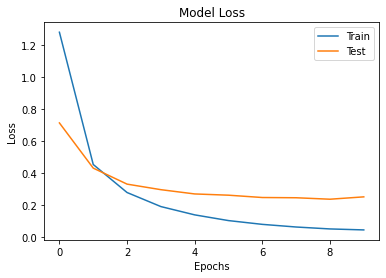

In [14]:
plt.plot(vgg16_history1.history['loss'])
plt.plot(vgg16_history1.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

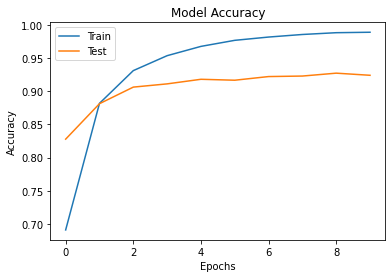

In [15]:
plt.plot(vgg16_history1.history['accuracy'])
plt.plot(vgg16_history1.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [30]:
model.save('/content/drive/My Drive/vgg16_10e_batchnorm.h5')

In [31]:
model = keras.models.load_model('/content/drive/My Drive/vgg16_10e_batchnorm.h5')

In [32]:
classes = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy',
          'Cherry_(including_sour)___Powdery_mildew','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
          'Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)',
           'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot',
           'Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy',
           'Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot',
           'Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite',
           'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy','Rice_Healthy','Rice_Unhealthy']


In [33]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(valid_x)

y_predictions = [np.argmax(i) for i in y_pred]

In [34]:
import pandas as pd
pd.set_option('display.max_columns',None)
confusion_matrix = pd.DataFrame(confusion_matrix(valid_y,y_predictions))

confusion_matrix.to_csv('/content/drive/My Drive/confusion_matrix.csv')

In [35]:
print(classification_report(valid_y,y_predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       200
           1       0.95      0.96      0.95       200
           2       0.96      0.96      0.96       200
           3       0.90      0.94      0.92       200
           4       0.94      0.98      0.96       200
           5       0.97      0.94      0.96       200
           6       0.98      0.98      0.98       200
           7       0.94      0.91      0.92       200
           8       1.00      0.98      0.99       200
           9       0.91      0.95      0.93       200
          10       0.99      0.99      0.99       200
          11       0.83      0.98      0.90       200
          12       0.99      0.81      0.89       200
          13       0.98      0.98      0.98       200
          14       0.98      0.97      0.98       200
          15       0.99      0.98      0.99       200
          16       0.94      0.92      0.93       200
          17       0.96    

In [36]:
classification_report

<function sklearn.metrics._classification.classification_report>

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


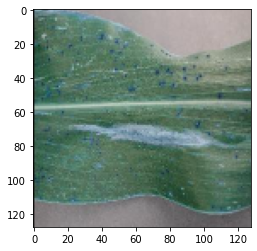

In [23]:
plt.imshow(valid_x[100])
plt.show
print(classes[valid_y[100][0]])

In [24]:
#predicting the same image using our trained model and we can see that our model has predicted correctly
img = valid_x[100]
img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
index = np.argmax(pred)
classes[index]

'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'

In [25]:
import tensorflow
print(tensorflow.__version__)

2.3.0


In [26]:
import numpy 
print(numpy.__version__)

1.18.5
